In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import string
import scipy.stats as stats

In [2]:
# Stock Data API
s_API_key = "fKgCbsZSgGeTDzsM87hd"

In [3]:
# Set up quandl API Authentication
auth = quandl.ApiConfig.api_key = s_API_key
BNC_data = quandl.get("BNC3/GWA_BTC", authtoken="fKgCbsZSgGeTDzsM87hd")

In [4]:
# Bitcoin data to a dataframe
BTC_df = pd.DataFrame(BNC_data)
BTC_df = BTC_df.reset_index()
k = []
for i in range(0,len(BTC_df['Date'])):
    k.append(str(str(BTC_df['Date'][i])[0:10]))
BTC_df['Date'] = k
BTC_df = BTC_df.rename(columns={'Close': 'Close_BTC'})
BTC_df

,Date,Open,High,Low,Close_BTC,Volume,VWAP,TWAP
0,2014-04-01,467.276162,488.622626,467.276162,479.562538,74776.478845,482.757440,482.815530
1,2014-04-02,479.196709,494.297933,431.318029,437.078735,114052.961126,460.192420,465.932466
2,2014-04-03,437.326535,449.738094,414.406179,445.597038,91415.080177,432.285885,433.282841
3,2014-04-04,445.179603,456.100459,429.161507,449.811259,51147.272019,443.458086,443.925310
4,2014-04-05,450.080200,464.088148,445.160655,461.695075,28449.194543,452.525832,452.949755
5,2014-04-06,463.180180,469.171431,451.129491,461.021853,21720.644202,460.921262,460.885805
6,2014-04-07,461.840024,464.272970,445.426509,452.901775,34949.203009,455.315609,455.750201
7,2014-04-08,450.065024,462.726648,447.960451,452.898545,24290.137840,453.964228,453.903273
8,2014-04-09,454.861445,464.369202,442.962551,449.302095,30135.245764,450.428162,451.077981
9,2014-04-10,449.717138,449.717138,358.701839,366.765666,149892.250029,401.836199,409.432611


In [5]:
# Import AMD stock information
AMD_df = pd.read_csv('AMD.csv')
AMD_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-01,4.04,4.10,4.02,4.07,4.07,18778800
1,2014-04-02,4.12,4.12,4.06,4.06,4.06,14839500
2,2014-04-03,4.07,4.10,3.97,4.00,4.00,16802300
3,2014-04-04,4.03,4.11,3.92,4.01,4.01,23427000
4,2014-04-07,3.98,3.99,3.83,3.88,3.88,24874600


In [6]:
# Import NVDA stock information
NVDA_df = pd.read_csv('NVDA.csv')
NVDA_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-01,18.48,18.870001,18.260000,18.650000,17.874998,16406800
1,2014-04-02,18.65,18.690001,18.450001,18.530001,17.759985,5998700
2,2014-04-03,18.57,19.180000,18.559999,18.730000,17.951674,14988700
3,2014-04-04,18.83,18.940001,18.070000,18.150000,17.395773,9200800
4,2014-04-07,18.16,18.559999,18.059999,18.209999,17.453281,10714400


In [7]:
# Import ETH data
ETH_df = pd.read_csv('ETH.csv')
ETH_df.head()

,Date,Price_ETH
0,2016-01-01,0.9340
1,2016-01-02,0.9316
2,2016-01-03,0.9693
3,2016-01-04,0.9518
4,2016-01-05,0.9502


In [8]:
# Combine individual Dataframe into one Dataframe
df = pd.merge(AMD_df,NVDA_df,on='Date',suffixes=['_AMD' , '_NVDA'])
df = pd.merge(df,BTC_df,on='Date')
df = pd.merge(ETH_df,df,on='Date')
df

,Date,Price_ETH,Open_AMD,High_AMD,Low_AMD,Close_AMD,Adj Close_AMD,Volume_AMD,Open_NVDA,High_NVDA,...,Close_NVDA,Adj Close_NVDA,Volume_NVDA,Open,High,Low,Close_BTC,Volume,VWAP,TWAP
0,2016-01-04,0.9518,2.77,2.82,2.63,2.77,2.77,32516800,32.290001,32.580002,...,32.369999,31.959547,8951900,431.618635,435.210303,430.480110,434.194009,342803.184449,432.824475,432.874372
1,2016-01-05,0.9502,2.77,2.80,2.64,2.75,2.75,12972300,32.980000,33.439999,...,32.889999,32.472950,12256800,433.989270,435.060867,431.123272,432.758399,431116.218960,433.250831,433.258764
2,2016-01-06,0.9553,2.66,2.71,2.47,2.51,2.51,23759400,32.349998,32.500000,...,31.530001,31.130199,11233600,432.599615,432.651410,425.171834,430.033070,437268.626332,430.095764,430.103226
3,2016-01-07,0.9492,2.43,2.48,2.26,2.28,2.28,22203500,30.740000,30.950001,...,30.280001,29.896048,16132600,430.128752,459.243571,427.417961,458.358450,607501.423458,447.962785,447.200308
4,2016-01-08,0.9855,2.36,2.42,2.10,2.14,2.14,31822400,30.670000,30.700001,...,29.629999,29.254288,9961800,458.378760,462.274204,449.654256,454.346624,522006.166226,455.341981,455.265188
5,2016-01-11,1.0500,2.16,2.36,2.12,2.34,2.34,19629300,29.660000,29.889999,...,29.680000,29.303656,10234300,445.244433,450.821845,442.641462,447.755430,403103.874300,446.730529,446.741248
6,2016-01-12,1.2200,2.40,2.46,2.28,2.39,2.39,17986100,30.209999,30.620001,...,30.180000,29.797318,11733900,447.671164,448.555163,437.696644,437.696644,608284.019686,445.888274,445.903620
7,2016-01-13,1.1300,2.40,2.45,2.21,2.25,2.25,12749700,30.410000,30.610001,...,29.260000,28.888983,12041800,433.180467,434.655160,420.713460,431.880823,817457.432674,428.769034,428.812149
8,2016-01-14,1.1600,2.29,2.35,2.21,2.21,2.21,15666600,28.660000,29.000000,...,28.670000,28.306463,15005900,431.692944,431.985140,427.232320,429.085808,454380.831344,429.652745,429.643044
9,2016-01-15,1.2200,2.10,2.13,1.99,2.03,2.03,21181600,27.520000,27.850000,...,27.110001,26.766243,20981100,429.149357,429.149357,368.203754,368.234730,858088.081282,405.029476,407.676588


In [9]:
# Calculate AMD mean
AMD_mean = np.mean(df['Close_AMD'])
AMD_mean

8.154771084337352

In [10]:
# Calculate NVDA mean
NVDA_mean = np.mean(df['Close_NVDA'])
NVDA_mean

82.66173486506024

In [11]:
# Caluculate BTC mean
BTC_mean = np.mean(df['Close_BTC'])
BTC_mean

1088.7271319185547

In [12]:
# Calculate ETH mean
ETH_mean = np.mean(df['Price_ETH'])
ETH_mean

56.74439036144578

In [13]:
# Calculate AMD standard deviation
AMD_std = (df['Close_AMD']).std()
AMD_std

4.210358216613565

In [14]:
# Calculate NVDA standard deviation
NVDA_std = (df['Close_NVDA']).std()
NVDA_std

42.93837799669304

In [15]:
# Calculate BTC standard deviation
BTC_std = (df['Close_BTC']).std()
BTC_std

884.5740308125427

In [16]:
# Calculate ETH standard deviation
ETH_std = (df['Price_ETH']).std()
ETH_std

94.68877218093441

In [17]:
# Calculate AMD iqr
AMD_q25 = df['Close_AMD'].quantile(0.25)
AMD_q75 = df['Close_AMD'].quantile(0.75)
AMD_iqr = AMD_q75 - AMD_q25
AMD_iqr , AMD_q75 , AMD_q25

(7.925000000000001, 12.295, 4.369999999999999)

In [18]:
# Calculate NVDA iqr
NVDA_q25 = df['Close_NVDA'].quantile(0.25)
NVDA_q75 = df['Close_NVDA'].quantile(0.75)
NVDA_iqr = NVDA_q75 - NVDA_q25
NVDA_iqr , NVDA_q75 , NVDA_q25

(61.67999950000001, 107.58000150000001, 45.900002)

In [19]:
# Calculate BTC iqr
BTC_q25 = df['Close_BTC'].quantile(0.25)
BTC_q75 = df['Close_BTC'].quantile(0.75)
BTC_iqr = BTC_q75 - BTC_q25
BTC_iqr , BTC_q75 , BTC_q25

(659.9729975, 1201.83918793, 541.86619043)

In [20]:
# Calculate ETH iqr
ETH_q25 = df['Price_ETH'].quantile(0.25)
ETH_q75 = df['Price_ETH'].quantile(0.75)
ETH_iqr = ETH_q75 - ETH_q25
ETH_iqr , ETH_q75 , ETH_q25

(34.275000000000006, 44.28, 10.004999999999999)

In [21]:
# Test correlations between BTC and AMD
BTC_AMD = df[['Close_BTC','Close_AMD']].corr()
BTC_AMD

,Close_BTC,Close_AMD
Close_BTC,1.000000,0.681556
Close_AMD,0.681556,1.000000


In [22]:
# Test correlation between BTC and NVDA
BTC_NVDA = df[['Close_BTC','Close_NVDA']].corr()
BTC_NVDA

,Close_BTC,Close_NVDA
Close_BTC,1.000000,0.881644
Close_NVDA,0.881644,1.000000


In [23]:
# Test correlation between BTC and ETH
BTC_ETH = df[['Close_BTC','Price_ETH']].corr()
BTC_ETH

,Close_BTC,Price_ETH
Close_BTC,1.000000,0.936116
Price_ETH,0.936116,1.000000


In [24]:
# Test correlation between AMD and ETH
AMD_ETH = df[['Close_AMD','Price_ETH']].corr()
AMD_ETH

,Close_AMD,Price_ETH
Close_AMD,1.000000,0.536961
Price_ETH,0.536961,1.000000


In [25]:
# Test correlation between NVDA and ETH
NVDA_ETH = df[['Close_NVDA','Price_ETH']].corr()
NVDA_ETH

,Close_NVDA,Price_ETH
Close_NVDA,1.000000,0.785049
Price_ETH,0.785049,1.000000


In [26]:
# Test correlation between NVDA and AMD
AMD_NVDA = df[['Close_NVDA','Close_AMD']].corr()
AMD_NVDA

,Close_NVDA,Close_AMD
Close_NVDA,1.000000,0.908586
Close_AMD,0.908586,1.000000


In [27]:
# Test if there is significant difference between AMD and NVDA
t_stat_B_N, p_val_B_N = stats.ttest_ind(df['Close_AMD'], df['Close_NVDA'], equal_var=False)
p_val_B_N.round() # Reject H0: There is no difference

0.0

In [28]:
# Test if there is significant difference between BTC and ETH
t_stat_B_E, p_val_B_E = stats.ttest_ind(df['Close_BTC'], df['Price_ETH'], equal_var=False)
p_val_B_E.round() # Reject H0: There is no difference

0.0

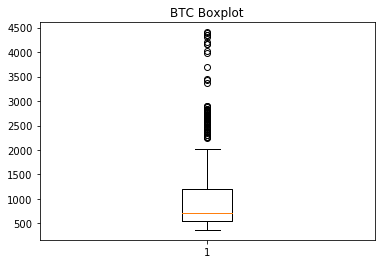

In [29]:
# Boxplot of BTC
BTC_boxplot = df['Close_BTC']
plt.boxplot(BTC_boxplot)
plt.title('BTC Boxplot')
plt.savefig('BTC_Box.png')
plt.show()

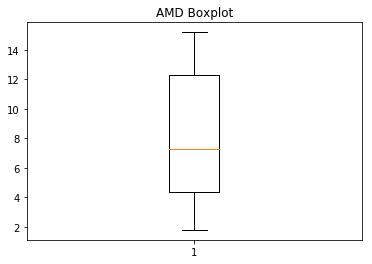

In [30]:
# Boxplot of AMD
AMD_boxplot = df['Close_AMD']
plt.boxplot(AMD_boxplot)
plt.title('AMD Boxplot')
plt.savefig('AMD_Box.png')
plt.show()

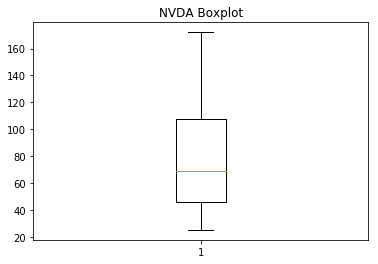

In [31]:
# Boxplot of NVDA
NVDA_boxplot = df['Close_NVDA']
plt.boxplot(NVDA_boxplot)
plt.title('NVDA Boxplot')
plt.savefig('NVDA_Box.png')
plt.show()

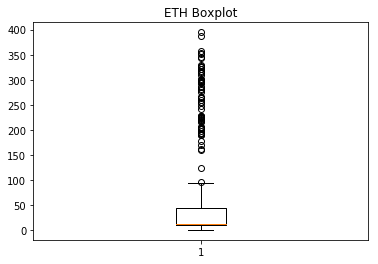

In [32]:
# Boxplot of ETH
ETH_boxplot = df['Price_ETH']
plt.boxplot(ETH_boxplot)
plt.title('ETH Boxplot')
plt.savefig('ETH_Box.png')
plt.show()

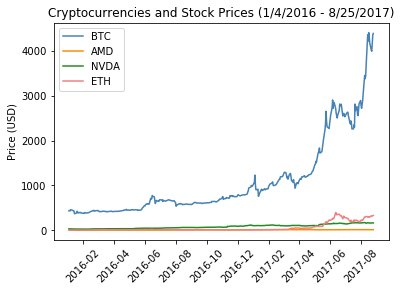

In [33]:
# Plot of BTC, AMD, NVDA and ETH prices (USD)
days = []
for i in df['Date']:
    i = i.split('-')
    i = date(int(i[0]),int(i[1]),int(i[2]))
    days.append(i)
df_graph = pd.DataFrame({'Date': days, 'BTC': df['Close_BTC'], 'AMD': df['Close_AMD'],
                         'NVDA': df['Close_NVDA'], 'ETH': df['Price_ETH']})
df_graph = df_graph.set_index('Date')
x1 = plt.plot(df_graph['BTC'],label='BTC',color='steelblue')
x2 = plt.plot(df_graph['AMD'],label='AMD',color='darkorange')
x3 = plt.plot(df_graph['NVDA'],label='NVDA',color='forestgreen')
x4 = plt.plot(df_graph['ETH'],label='ETH',color='lightcoral')
plt.legend()
plt.title('Cryptocurrencies and Stock Prices (1/4/2016 - 8/25/2017)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.savefig('Prices.png')
plt.show()

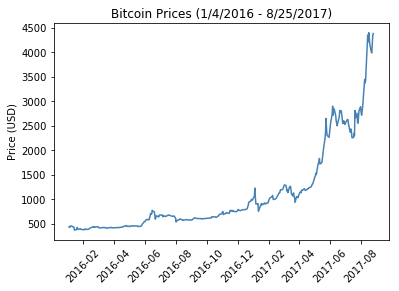

In [34]:
# Plot of Bitcoin Prices
plt.plot(df_graph['BTC'],label='BTC',color='steelblue')
plt.title('Bitcoin Prices (1/4/2016 - 8/25/2017)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.savefig('BTC_Prices.png')
plt.show()

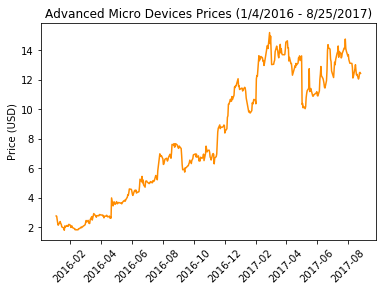

In [35]:
# Plot of AMD Prices
plt.plot(df_graph['AMD'],label='AMD',color='darkorange')
plt.title('Advanced Micro Devices Prices (1/4/2016 - 8/25/2017)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.savefig('AMD_Prices.png')
plt.show()

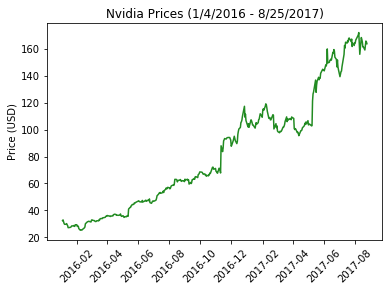

In [36]:
# Plot of Nvidia Prices
plt.plot(df_graph['NVDA'],label='NVDA',color='forestgreen')
plt.title('Nvidia Prices (1/4/2016 - 8/25/2017)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.savefig('NVDA_Prices.png')
plt.show()

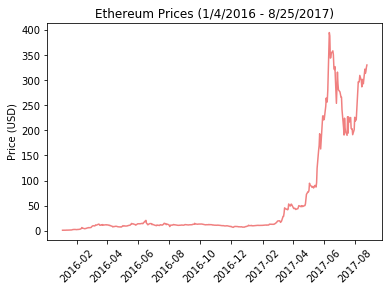

In [37]:
# Plot of Ethereum Prices
plt.plot(df_graph['ETH'],label='ETH',color='lightcoral')
plt.title('Ethereum Prices (1/4/2016 - 8/25/2017)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.savefig('ETH_Prices.png')
plt.show()